Single Star with Spots
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_star()

Adding Spots
---------------------

Let's add one spot to our star.  Since there is only one star, the spot will automatically attach without needing to provide component (as is needed in the [binary with spots example](./binary_spots.ipynb)

In [3]:
b.add_spot(radius=30, colat=80, long=0, relteff=0.9)

<ParameterSet: 5 parameters | contexts: feature, compute>

Spot Parameters
-----------------

A spot is defined by the colatitude and longitude of its center, its angular radius, and the ratio of temperature of the spot to the local intrinsic value.

In [4]:
print(b['spot'])

ParameterSet: 4 parameters
             colat@spot01@feature: 80.0 deg
              long@spot01@feature: 0.0 deg
            radius@spot01@feature: 30.0 deg
           relteff@spot01@feature: 0.9


The 'colat' parameter defines the colatitude on the star measured from its North (spin) Pole.  The 'long' parameter measures the longitude of the spot - with longitude = 0 being defined as pointing towards the observer at t0 for a single star.  See the [spots tutorial](../tutorials/spots.ipynb) for more details.

In [5]:
times = np.linspace(0, 10, 11)
b.set_value('period', 10)
b.add_dataset('mesh', times=times, columns=['teffs'])

Fri, 02 Jul 2021 19:50 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 85 parameters | contexts: figure, compute, constraint, dataset>

In [6]:
b.run_compute(distortion_method='rotstar', irrad_method='none')

100%|██████████| 11/11 [00:00<00:00, 267.91it/s]


<ParameterSet: 57 parameters | qualifiers: xyz_normals, comments, xyz_elements, uvw_normals, teffs, uvw_elements, times>

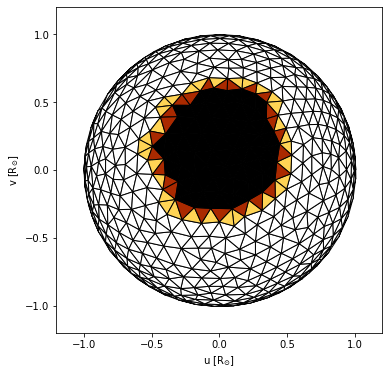

In [7]:
afig, mplfig = b.plot(x='us', y='vs', fc='teffs', 
                      animate=True, save='single_spots_1.gif', save_kwargs={'writer': 'imagemagick'})

![animation](single_spots_1.gif)

If we set t0 to 5 instead of zero, then the spot will cross the line-of-sight at t=5 (since the spot's longitude is 0).

In [8]:
b.set_value('t0', 5)

In [9]:
b.run_compute(distortion_method='rotstar', irrad_method='none')

Fri, 02 Jul 2021 19:50 BUNDLE       WARNING overwriting model: latest
100%|██████████| 11/11 [00:00<00:00, 245.40it/s]


<ParameterSet: 57 parameters | qualifiers: xyz_normals, comments, xyz_elements, uvw_normals, teffs, uvw_elements, times>

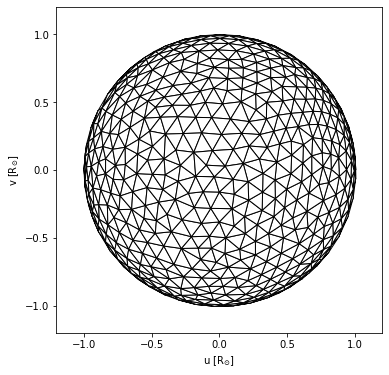

In [10]:
afig, mplfig = b.plot(x='us', y='vs', fc='teffs', 
                     animate=True, save='single_spots_2.gif', save_kwargs={'writer': 'imagemagick'})

![animation](single_spots_2.gif)

And if we change the inclination to 0, we'll be looking at the north pole of the star.  This clearly illustrates the right-handed rotation of the star.  At time=t0=5 the spot will now be pointing in the negative y-direction.

In [11]:
b.set_value('incl', 0)

In [12]:
b.run_compute(distortion_method='rotstar', irrad_method='none')

Fri, 02 Jul 2021 19:50 BUNDLE       WARNING overwriting model: latest
100%|██████████| 11/11 [00:00<00:00, 247.61it/s]


<ParameterSet: 57 parameters | qualifiers: xyz_normals, comments, xyz_elements, uvw_normals, teffs, uvw_elements, times>

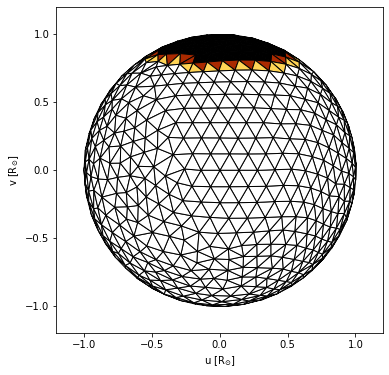

In [13]:
afig, mplfig = b.plot(x='us', y='vs', fc='teffs', 
                     animate=True, save='single_spots_3.gif', save_kwargs={'writer': 'imagemagick'})

![animation](single_spots_3.gif)